In [8]:
import plotly.express as px
import json
import pandas as pd
import plotly.express as px
from ollama import chat
from ollama import ChatResponse

In [2]:
hprc_r2_df = pd.read_csv('findability-funk/hprc_release2_sample_metadata.csv',encoding='latin-1')
ont_r2_df = pd.read_csv('findability-funk/data_ont_pre_release.index.csv')
ont_r2_df.rename(columns={
    'sample_ID':'sample_id'
}, inplace=True)

hprc_ont_r2_df = pd.merge(hprc_r2_df,
                          ont_r2_df, 
                          on='sample_id', 
                          how='right')

In [3]:
df = hprc_ont_r2_df[['sample_id', 'population_abbreviation', 'read_N50', 'total_Gbp', 'coverage',
         '100kb+', '200kb+', '300kb+', '400kb+', '500kb+', '1Mb+']]
df = df.dropna()

In [15]:
prompt_1 = f"""
You are a Python data visualization assistant.

A pandas DataFrame called `df` already exists and contains the following columns:
- 'sample_id'
- 'population_abbreviation'
- 'coverage'

Do not redefine or create the DataFrame.

Write Python code that:
- Uses Plotly Express (`px.box`) to create a box plot
- Sets `x='population_abbreviation'` and `y='coverage'`
- Sets `points="all"` to display all sample points
- Colors by `'population_abbreviation'`
- Includes `'sample_id'` in `hover_data`
- Uses the `'plotly_dark'` template
- Updates the layout with:
  - Title: "Coverage Distribution by Population"
  - X-axis label: "Population"
  - Y-axis label: "Coverage (x)"
- Removes the legend by setting `hoverinfo='none'` in `fig.update_traces()`
- Ends with `fig.show()`

Respond ONLY with the Python code. Do not redefine `df`. No markdown or explanations.
"""

prompt = prompt = f"""
You are a Python data visualization assistant.

A pandas DataFrame called `df` already exists and contains the following columns:
- 'sample_id'
- 'population_abbreviation'
- 'coverage'

Do not redefine or create the DataFrame.

Write Python code that:
- Uses Plotly Express (`px.box`) to create a box plot
- Sets `x='population_abbreviation'` and `y='coverage'`
- Sets `points="all"` to display all sample points
- Colors by `'population_abbreviation'`
- Includes `'sample_id'` in `hover_data`
- Uses the `'plotly_dark'` template
- Updates the layout with:
  - Title: "Coverage Distribution by Population"
  - X-axis label: "Population"
  - Y-axis label: "Coverage (x)"
- Removes the legend by setting `hoverinfo='none'` in `fig.update_traces()`
- Exports the figure to an HTML file using `fig.write_html('demo-ollama-hprc-r2-plotly-dashboard.html')`
- Ends with `fig.show()`
- **Do NOT import `write_html` or use `plotly.offline`**

Respond ONLY with the valid Python code. No markdown or explanations.
"""

# Send to Ollama
response = chat(
    model='llama3.2',
    messages=[{"role": "user", "content": prompt}],
    options={
        "temperature": 0.3,
        "top_p": 0.9,
        "num_ctx": 4096
    }
)

# Print output
print(response['message']['content'])


import plotly.express as px
import pandas as pd

fig = px.box(df, x='population_abbreviation', y='coverage', points="all", color='population_abbreviation',
              hover_data=['sample_id'], template='plotly_dark')

fig.update_traces(hoverinfo='none')

fig.update_layout(
    title='Coverage Distribution by Population',
    xaxis_title='Population',
    yaxis_title='Coverage (x)'
)

fig.show()

fig.write_html('demo-ollama-hprc-r2-plotly-dashboard.html')


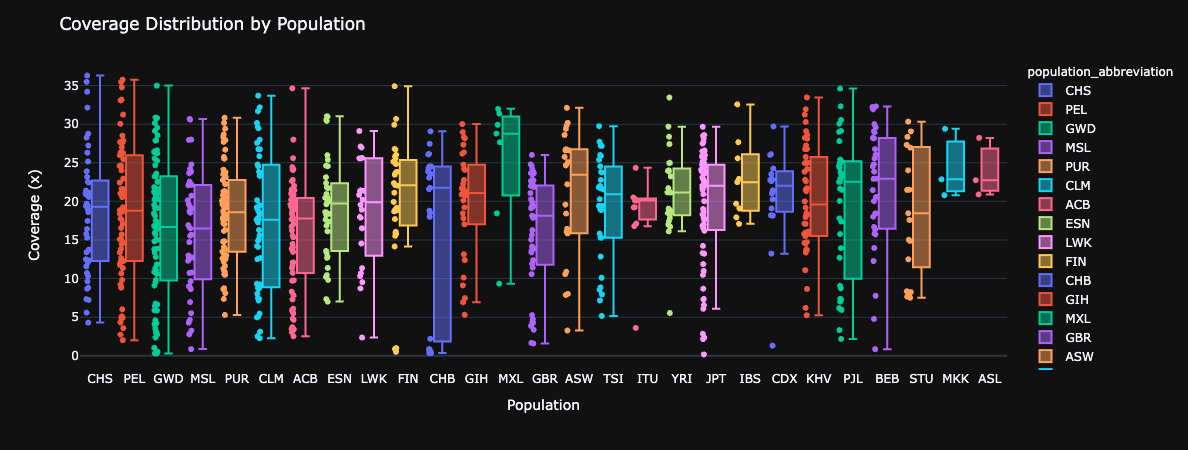

In [16]:
import re

code = response['message']['content']

# Try to extract Python code block (if wrapped in ```python ... ```)
match = re.search(r"```(?:python)?\s*(.*?)```", code, re.DOTALL)
if match:
    code_to_exec = match.group(1)
else:
    code_to_exec = code

try:
    exec(code_to_exec)
except Exception as e:
    print("Execution failed:", e)